In [1]:
ls

 data/                                traffic_classifier_model.h5
 data.zip                            'Traffic_Sign_Recongnition (copy).ipynb'
 GUI_Traffic_Sign_Classification.py   Traffic_Sign_Recongnition.ipynb


In [4]:
cd /home/sathish/Downloads/Traffic_Sign_Recongnition

/home/sathish/Downloads/Traffic_Sign_Recongnition


In [7]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D


# Function to load and preprocess images
def load_images_from_directory(path, image_size=(30, 30)):
    images = os.listdir(path)
    data = []
    labels = []
    class_id = int(path.split('/')[-1])

    for image_filename in images:
        try:
            image = Image.open(os.path.join(path, image_filename))
            image = image.resize(image_size)
            image = np.array(image)
            data.append(image)
            labels.append(class_id)
        except:
            print(f"Error loading image: {os.path.join(path, image_filename)}")

    return data, labels

# Retrieving the images and their labels
data = []
labels = []
num_classes = 43
current_path = os.getcwd()

for class_id in range(num_classes):
    path = os.path.join(current_path, '/home/sathish/Downloads/Traffic_Sign_Recongnition/Traffic_Sign_Recongnition/data/data/Train', str(class_id))
    class_data, class_labels = load_images_from_directory(path)
    data.extend(class_data)
    labels.extend(class_labels)

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))

# Replace the Flatten layer with GlobalAveragePooling2D
model.add(GlobalAveragePooling2D())

# Optionally, you can add more Dense layers with BatchNormalization and Dropout
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Make sure num_classes is defined properly for your specific problem
model.add(Dense(num_classes, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=epochs, validation_data=(X_test, y_test_one_hot))
#model.save("model.h5")


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


/home/sathish/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


2024-09-25 15:49:30.783134: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84690900 exceeds 10% of free system memory.


  1/981 ━━━━━━━━━━━━━━━━━━━━ 2:00:52 7s/step - accuracy: 0.0312 - loss: 4.8309

2024-09-25 15:49:38.215559: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29427200 exceeds 10% of free system memory.
2024-09-25 15:49:38.320746: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21496800 exceeds 10% of free system memory.
2024-09-25 15:49:38.446004: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29427200 exceeds 10% of free system memory.


  2/981 ━━━━━━━━━━━━━━━━━━━━ 5:47 355ms/step - accuracy: 0.0234 - loss: 4.9185

2024-09-25 15:49:38.660390: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21496800 exceeds 10% of free system memory.


981/981 ━━━━━━━━━━━━━━━━━━━━ 235s 232ms/step - accuracy: 0.3359 - loss: 2.6765 - val_accuracy: 0.9082 - val_loss: 0.3062
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 263s 234ms/step - accuracy: 0.8935 - loss: 0.3450 - val_accuracy: 0.9846 - val_loss: 0.0608
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 229s 233ms/step - accuracy: 0.9471 - loss: 0.1707 - val_accuracy: 0.9697 - val_loss: 0.0980
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 226s 230ms/step - accuracy: 0.9631 - loss: 0.1233 - val_accuracy: 0.9898 - val_loss: 0.0367
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 236s 240ms/step - accuracy: 0.9686 - loss: 0.1025 - val_accuracy: 0.9925 - val_loss: 0.0246
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 248s 226ms/step - accuracy: 0.9718 - loss: 0.0932 - val_accuracy: 0.9917 - val_loss: 0.0286
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 233s 237ms/step - accuracy: 0.9743 - loss: 0.0861 - val_accuracy: 0.9909 - val_loss: 0.0259
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 224s 228ms/step - accuracy: 0.9735 - loss: 0.08

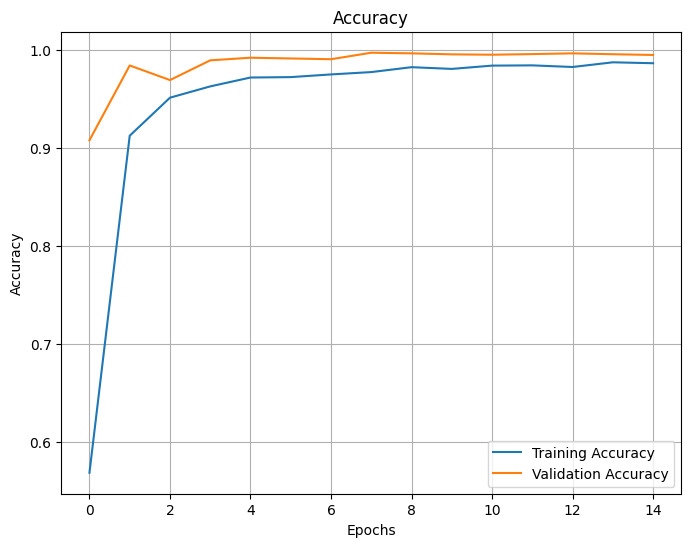

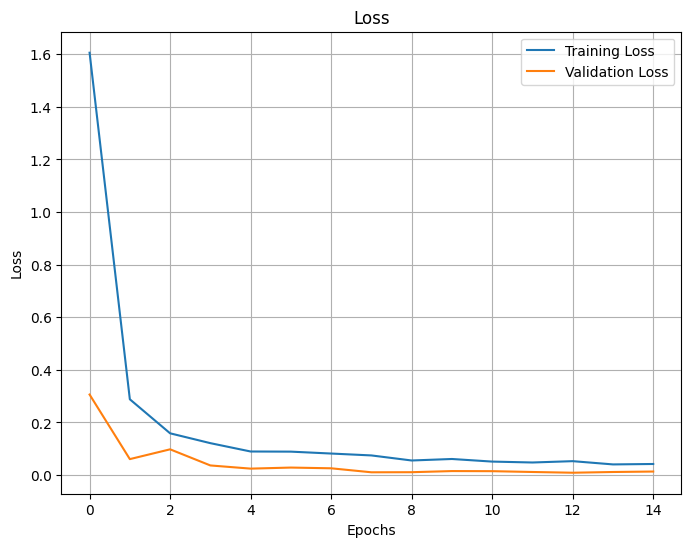

In [8]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting graphs for accuracy and loss
plot_accuracy(history)
plot_loss(history)


In [9]:
ls

__MACOSX/  Traffic_Sign_Recongnition/


In [17]:
cd /home/sathish/Downloads/Traffic_Sign_Recongnition/Traffic_Sign_Recongnition/data/data

/home/sathish/Downloads/Traffic_Sign_Recongnition/Traffic_Sign_Recongnition/data/data


In [18]:
ls

Meta/  Meta.csv  Test/  Test.csv  Train/  Train.csv


In [30]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd

y_test = pd.read_csv('/home/sathish/Downloads/Traffic_Sign_Recongnition/Traffic_Sign_Recongnition/data/data/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open("/home/sathish/Downloads/Traffic_Sign_Recongnition/Traffic_Sign_Recongnition/data/data/"+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

# Make predictions on the test data
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

model.save('traffic_classifier_model2.h5')

395/395 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step


0.9623911322248614


### Data set link
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [28]:
y_test = pd.read_csv('/home/sathish/Downloads/Traffic_Sign_Recongnition/Traffic_Sign_Recongnition/data/data/Test.csv')
y_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png
